✓ Using processed data: /Users/benjaminnguyen/Employee_attrition/data/processed/employee_data_processed.csv
Data loaded successfully.
Dataset shape: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    

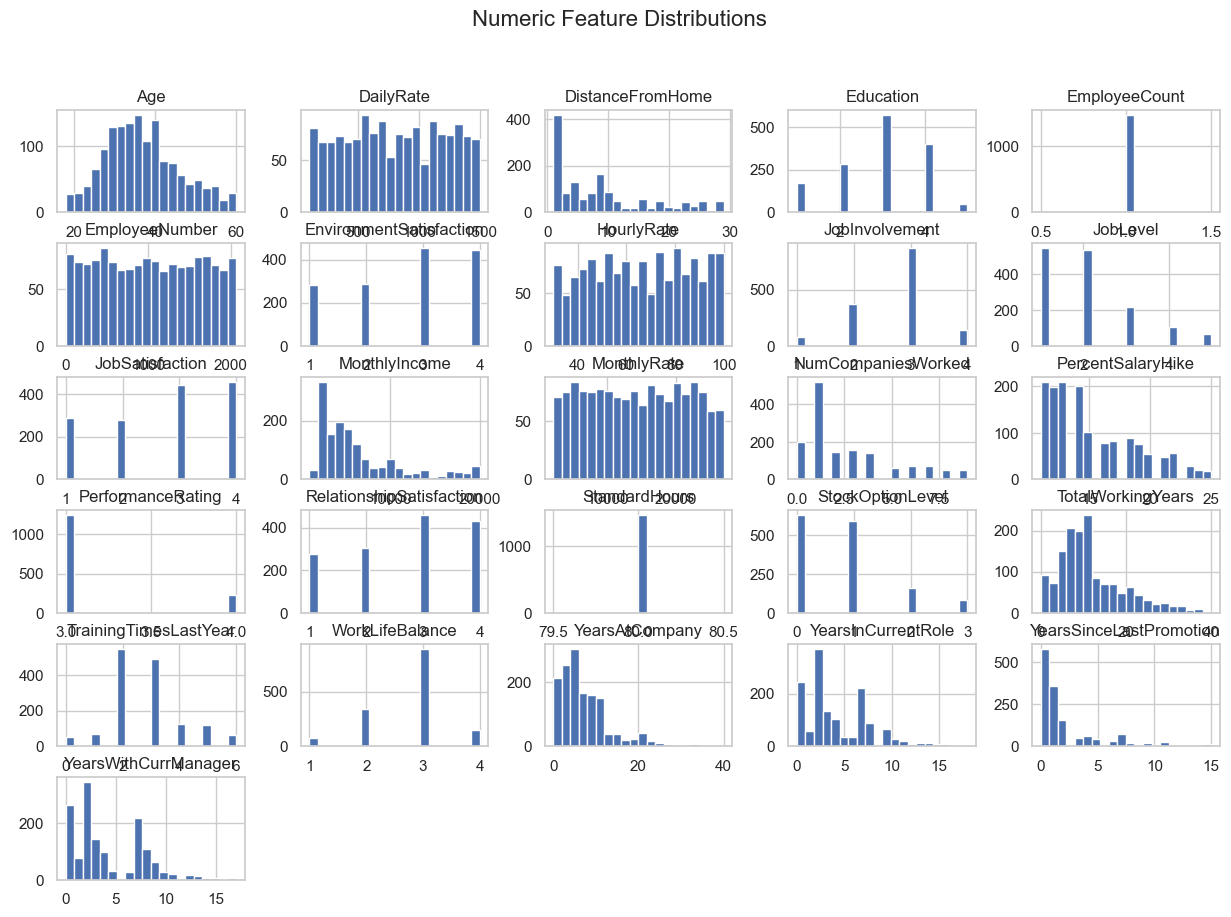

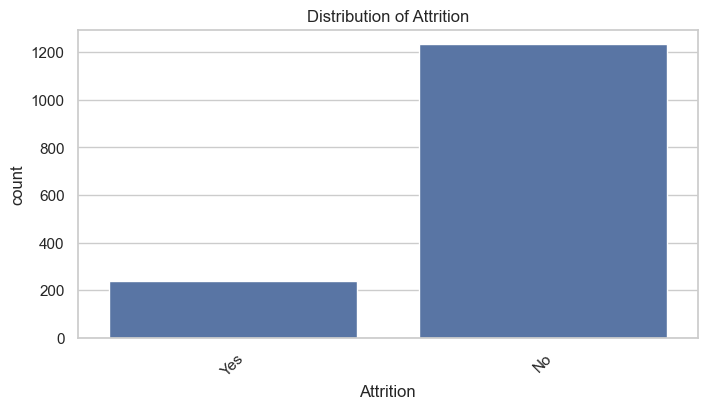

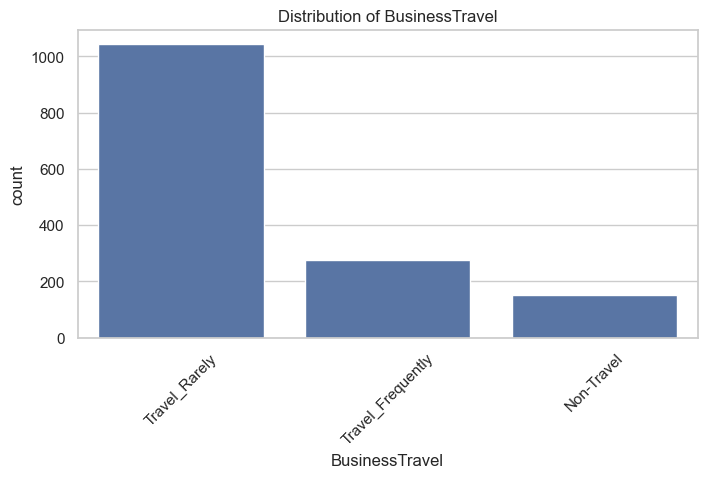

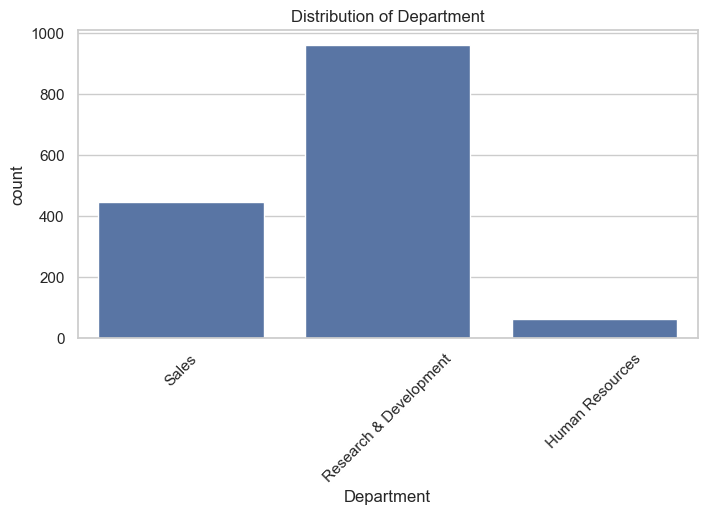

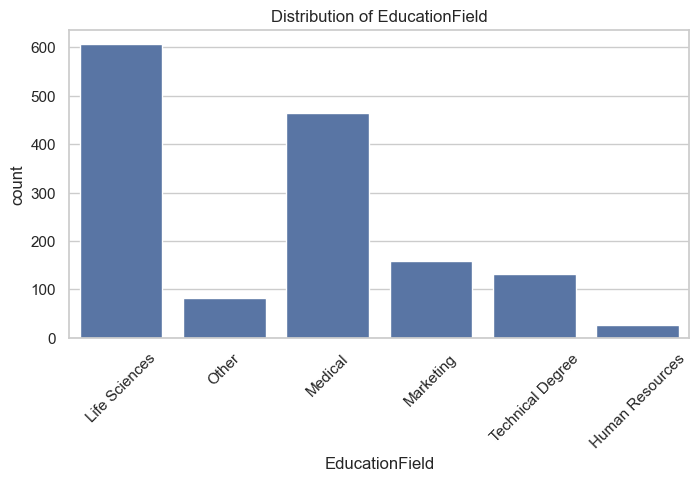

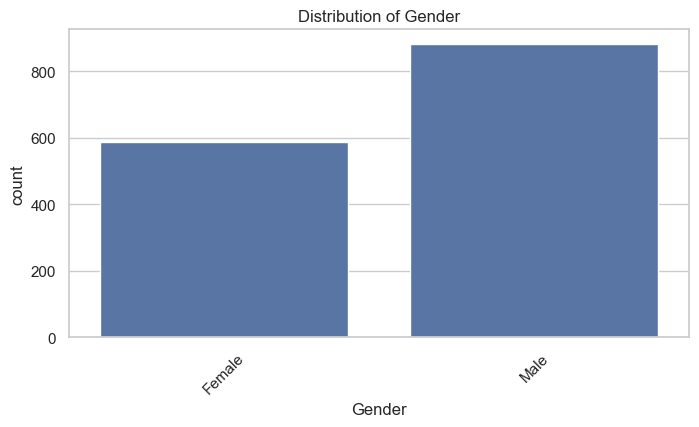

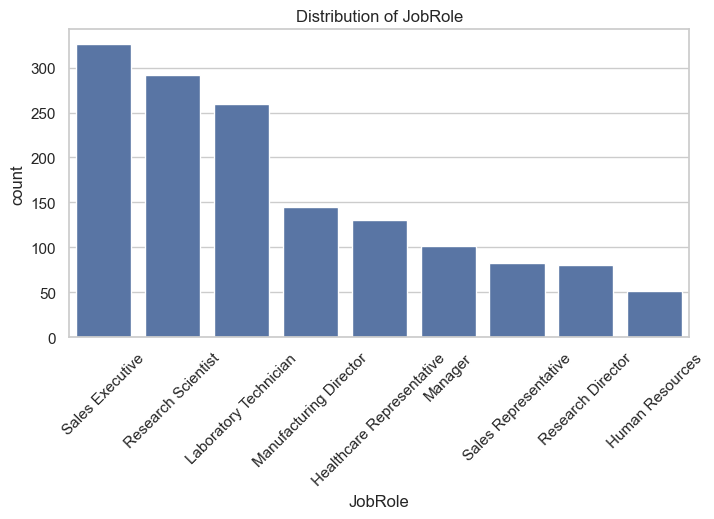

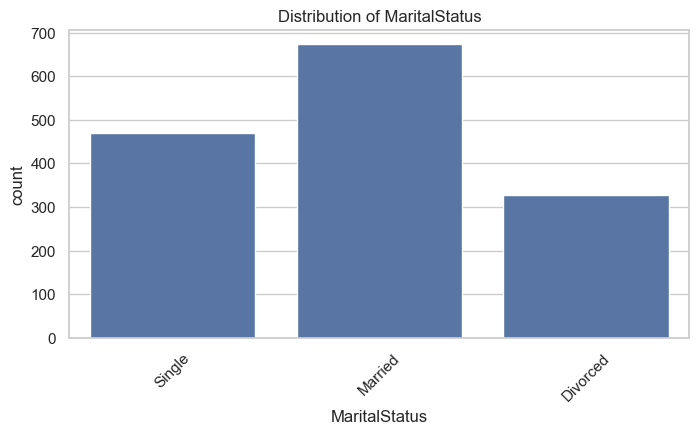

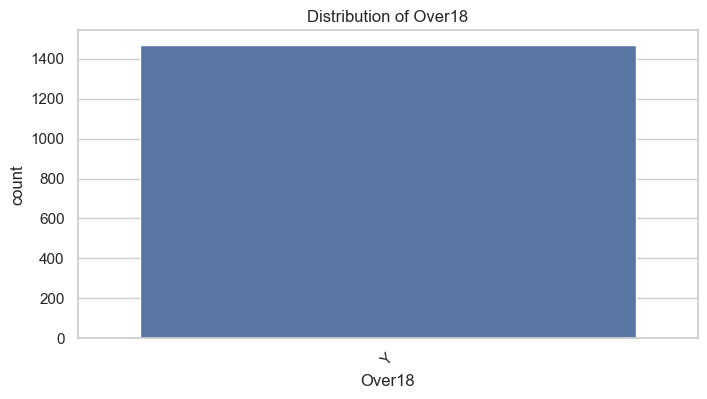

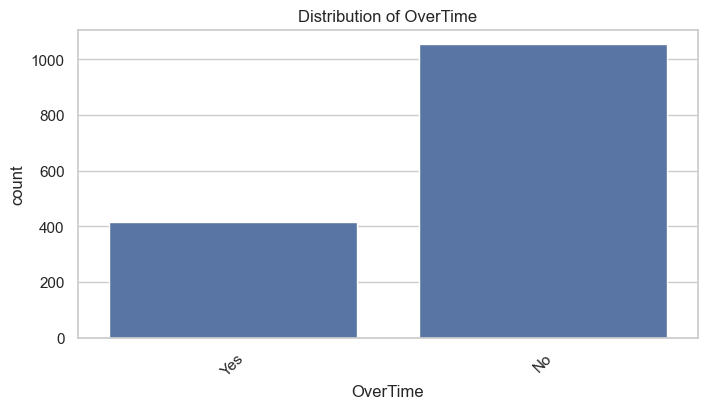

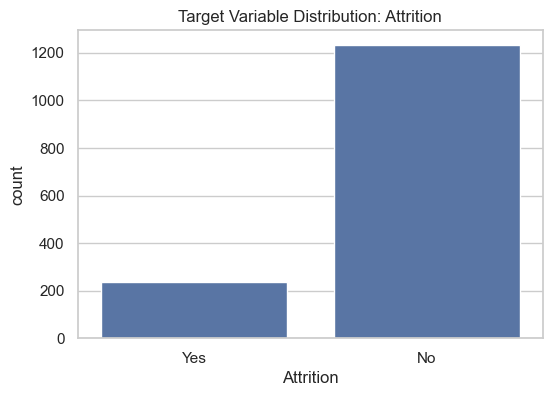

Attrition
No     1233
Yes     237
Name: count, dtype: int64


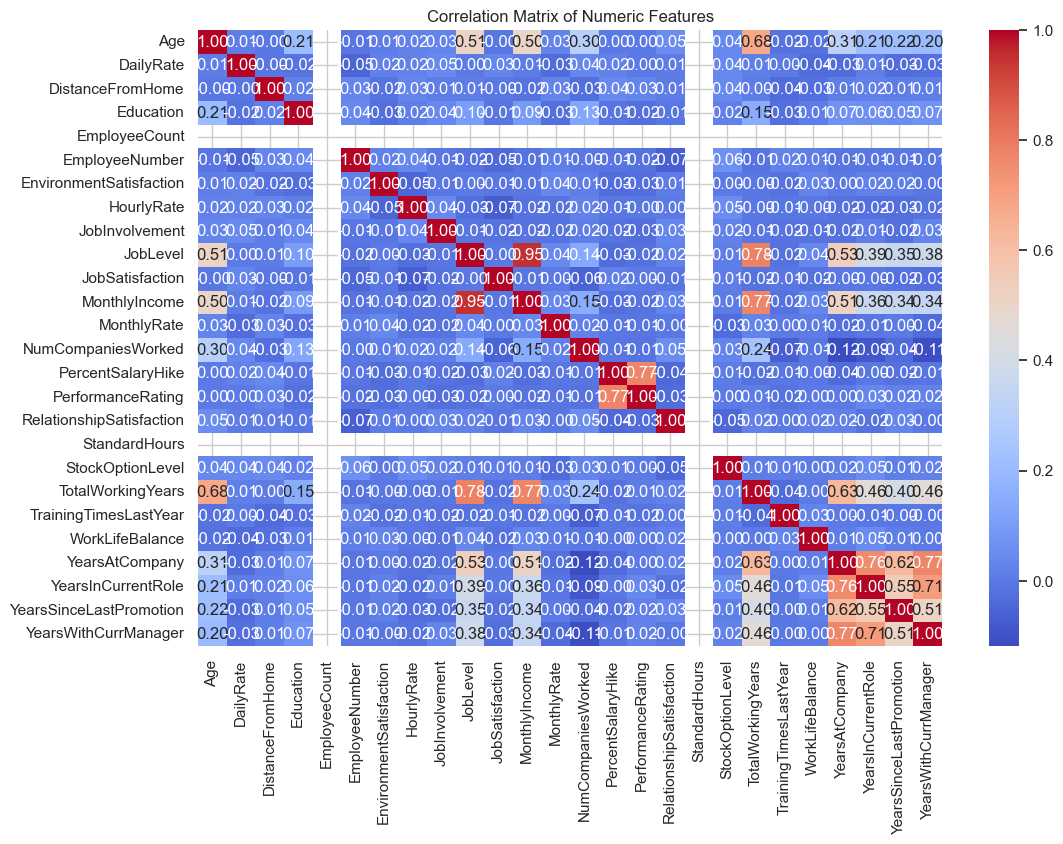

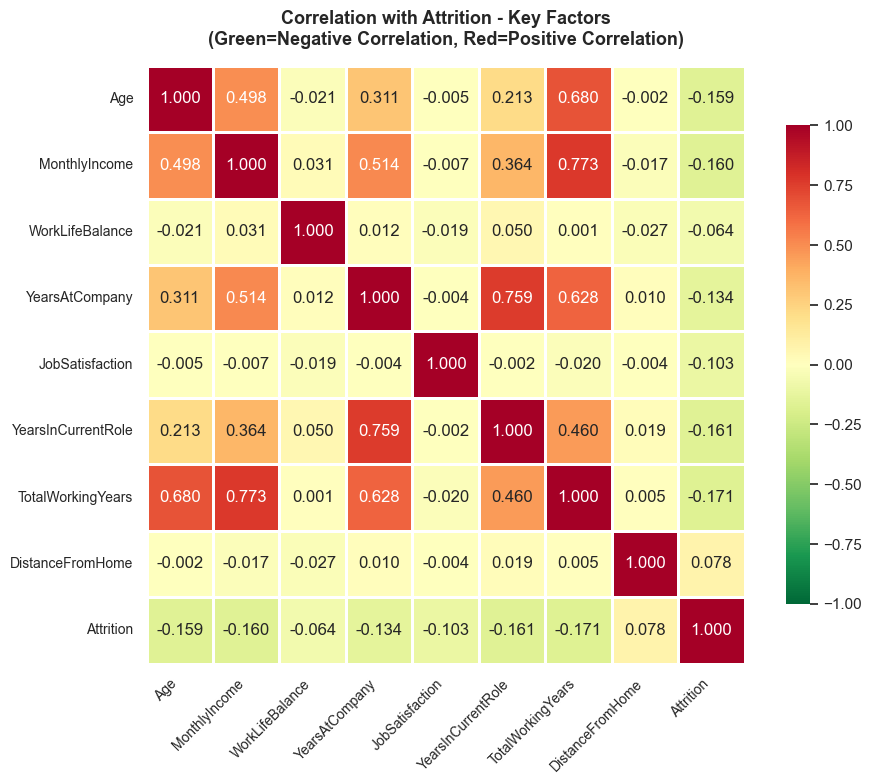


TOP CORRELATIONS WITH ATTRITION

Negative correlations (protective factors - reduce attrition risk):
  TotalWorkingYears             : -0.171 ← Higher TotalWorkingYears = Less attrition
  YearsInCurrentRole            : -0.161 ← Higher YearsInCurrentRole = Less attrition
  MonthlyIncome                 : -0.160 ← Higher MonthlyIncome = Less attrition
  Age                           : -0.159 ← Higher Age = Less attrition
  YearsAtCompany                : -0.134 ← Higher YearsAtCompany = Less attrition

Positive correlations (risk factors - increase attrition risk):
  DistanceFromHome              : +0.078 ← Higher DistanceFromHome = More attrition
Processed data saved to /Users/benjaminnguyen/Employee_attrition/data/processed/employee_data_processed.csv


In [1]:
# ============================================================
# Employee Attrition Project - Starter Notebook
# 01_data_exploration.ipynb
# Purpose: Load data, perform initial cleaning and exploratory analysis
# ============================================================

# -------------------------
# 1. Import Libraries
# -------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Set some display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
sns.set(style='whitegrid')

# -------------------------
# 2. Set Paths (Works on Mac & Windows)
# -------------------------
import os
from pathlib import Path

# Auto-detect project root
current_dir = Path.cwd()
if current_dir.name == "notebooks":
    project_root = current_dir.parent
else:
    project_root = current_dir

# Convert to string for compatibility
project_root = str(project_root)

# Set folder paths
data_folder = os.path.join(project_root, 'data', 'raw')
processed_folder = os.path.join(project_root, 'data', 'processed')

# Create folders if they don't exist
os.makedirs(data_folder, exist_ok=True)
os.makedirs(processed_folder, exist_ok=True)

# Try to find the employee data file
file_name = 'employee_data.csv'
file_path = os.path.join(data_folder, file_name)

if not os.path.exists(file_path):
    alt_path = os.path.join(processed_folder, 'employee_data_processed.csv')
    if os.path.exists(alt_path):
        file_path = alt_path
        print(f"✓ Using processed data: {file_path}")
    else:
        raise FileNotFoundError(f"File not found at: {file_path}")
else:
    print(f"✓ File found at: {file_path}")



# -------------------------
# 3. Load Dataset
# -------------------------
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the path and filename.")

# -------------------------
# 4. Quick Overview
# -------------------------
# Check shape
print(f"Dataset shape: {df.shape}")

# View first 5 rows
df.head()

# Info and data types
df.info()

# Summary statistics for numeric columns
df.describe()

# -------------------------
# 5. Missing Values Check
# -------------------------
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

missing_table = pd.concat([missing_summary, missing_percentage], axis=1)
missing_table.columns = ['Missing Count', 'Missing %']
print(missing_table[missing_table['Missing Count'] > 0])

# -------------------------
# 6. Basic Distribution Checks
# -------------------------
# Numeric features
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle('Numeric Feature Distributions', fontsize=16)
plt.show()

# Categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# -------------------------
# 7. Target Variable Analysis
# -------------------------
# Replace 'Attrition' with your target column name
target = 'Attrition'  

if target in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=target)
    plt.title(f"Target Variable Distribution: {target}")
    plt.show()
    
    print(df[target].value_counts())
else:
    print(f"Target column '{target}' not found in dataset.")

# -------------------------
# 8. Correlation Check
# -------------------------
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# -------------------------
# 8.5. FOCUSED CORRELATION - KEY ATTRITION FACTORS
# -------------------------
# Key features mentioned in project requirements
key_features = [
    'Age', 
    'MonthlyIncome',
    'WorkLifeBalance',
    'YearsAtCompany',
    'JobSatisfaction',
    'YearsInCurrentRole',
    'TotalWorkingYears',
    'DistanceFromHome'
]

# Create temp dataframe with numeric Attrition
df_focused = df.copy()
df_focused['Attrition'] = df_focused['Attrition'].map({'Yes': 1, 'No': 0})

# Add Attrition to analysis
key_features.append('Attrition')

# Select only features that exist in dataset
available_features = [f for f in key_features if f in df_focused.columns]
focused_corr = df_focused[available_features].corr()

# Create clean, focused heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    focused_corr, 
    annot=True,
    fmt='.3f',
    cmap='RdYlGn_r', 
    center=0,
    square=True,
    linewidths=1,
    vmin=-1, vmax=1,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation with Attrition - Key Factors\n(Green=Negative Correlation, Red=Positive Correlation)', 
          fontsize=13, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Print top correlations with Attrition
print("\n" + "="*60)
print("TOP CORRELATIONS WITH ATTRITION")
print("="*60)
attrition_correlations = focused_corr['Attrition'].drop('Attrition').sort_values(key=abs, ascending=False)

print("\nNegative correlations (protective factors - reduce attrition risk):")
negative = attrition_correlations[attrition_correlations < 0].head(5)
for feature, corr in negative.items():
    print(f"  {feature:30s}: {corr:+.3f} ← Higher {feature} = Less attrition")

print("\nPositive correlations (risk factors - increase attrition risk):")
positive = attrition_correlations[attrition_correlations > 0].head(5)
if len(positive) > 0:
    for feature, corr in positive.items():
        print(f"  {feature:30s}: {corr:+.3f} ← Higher {feature} = More attrition")
else:
    print("  None found - All factors are protective!")

print("="*60)
# -------------------------
# 9. Save Processed Copy (Optional)
# -------------------------
processed_file_path = os.path.join(processed_folder, 'employee_data_processed.csv')
os.makedirs(processed_folder, exist_ok=True)
df.to_csv(processed_file_path, index=False)
print(f"Processed data saved to {processed_file_path}")
